# **Competition Description** 

Kaggle competition [link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

![image](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png)


Determining the price of a home is more complex than simply multiplying its lot size with its rate. Some factors like number of bedrooms, sizes of the rooms, and the neighborhood, are apparent features. But there are some more features that impact the price of a home like the quality of the basement, the exterior finishes, and more. 

We are working with a dataset that has 79 explanatory variables describing features of homes in Ames, Iowa. Your task is to learn the trends in the data and build a generalizable machine learning model that can predict the price of a house given its features.  

## Objectives 

1. Perform feature selection
2. Perform model selection 
3. Make the model as generalizable as possible.  


We will bring all the concepts you have learned so far together in this notebook. 

What have we done so far? 
1. We have explored the data and made it ready for machine learning models 
2. We used a vanilla linear regression model to set a baseline

What are we going to do now? 
1. There are too many features in the data. 
We will try to reduce the number of features. In doing so, we hope that the model's performance improves, but even if it does not improve and stays the same, by reducing the number of features, we will end up with a more generalizable model than we started with. 

Feature selection will be achieved through feature selection methods and regularizing linear methods. 

2. Try various models and algorithms to achieve better predictability. 


In [1]:
# Importing all the libraries 

# data manipulation libraries
import pandas as pd
import numpy as np
import pylab as pl

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
# reading the different data sets 
x_train = pd.read_csv("x_train.csv")
y_train = pd.read_csv("y_train.csv")

x_test = pd.read_csv("x_test.csv")
y_test = pd.read_csv("y_test.csv")


In [3]:
x_train = x_train.drop(["Unnamed: 0"], axis =1)
y_train = y_train.drop(["Unnamed: 0"], axis =1)

x_test = x_test.drop(["Unnamed: 0"], axis =1)
y_test = y_test.drop(["Unnamed: 0"], axis =1)

In [4]:
# print the shape of the data
x_train.shape

(1168, 248)

## Feature selection

### Automatic feature selection with RFE

We start with RFE since the number of features is too huge to make any decision manually. And the feature set is likely very sparse, and most of the features do not have any impact on the performance. So, we can quickly trim down the number of features to a more manageable list. 

In [5]:
# Import RFE 
from sklearn.feature_selection import RFE

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

In [6]:
# List for holding values 
i_list = []
r2_list = []
rmse_list = []
cross_val_list = []

In [7]:
model = LinearRegression()
for i in range(10, 248, 3):                                                                               # Performing RFE with 3 step jumps
    rfe = RFE(model , n_features_to_select = i )                                                          # running RFE with i variable output.
    rfe.fit(x_train, y_train)                                                                             # Fit the RFE model 
    col = x_train.columns[rfe.support_]                                                                   # identify the columns slected by the RFE model
    linear_regressor = LinearRegression()             
    linear_regressor.fit(x_train[col],y_train)                                                            # Train a new linear model with RFE slected columns 
    crossvalidation = cross_val_score(linear_regressor, x_train[col], y_train, cv=5, n_jobs=-1).mean()    # Calculate the cross vall scores for the new model  
    # predictions on the train set. 
    y_pred = linear_regressor.predict(x_train[col])
    r2_val = r2_score(y_train,y_pred)                                                                         # find R2 and RMSE for the new model 
    rmse_error = mean_squared_error (y_train, y_pred, squared = False)
    # maintain a list for performance to analyse in future
    i_list.append(i)
    r2_list.append(r2_val)
    rmse_list.append(rmse_error)
    cross_val_list.append(crossvalidation)
    # print the outputs 
    print (i)
    print ("R2 score for the model is :",r2_val )
    print ("RMSE error for the model is :",rmse_error )
    print ("Mean Cross Validation Score (r2) :",crossvalidation )
    print ("==================================================")

10
R2 score for the model is : 0.476108774128305
RMSE error for the model is : 55899.69239836165
Mean Cross Validation Score (r2) : 0.45252240369304386
13
R2 score for the model is : 0.5452715251936314
RMSE error for the model is : 52079.27512071175
Mean Cross Validation Score (r2) : 0.5151958082196906
16
R2 score for the model is : 0.5939725532510587
RMSE error for the model is : 49211.49420311929
Mean Cross Validation Score (r2) : 0.5613767422358056
19
R2 score for the model is : 0.597859912412158
RMSE error for the model is : 48975.34902522906
Mean Cross Validation Score (r2) : 0.5614671146441096
22
R2 score for the model is : 0.5990540142928265
RMSE error for the model is : 48902.58205163792
Mean Cross Validation Score (r2) : 0.5574173961996439
25
R2 score for the model is : 0.6017423942541795
RMSE error for the model is : 48738.358133996706
Mean Cross Validation Score (r2) : 0.5422105731436375
28
R2 score for the model is : 0.7151181889496139
RMSE error for the model is : 41221.25

130
R2 score for the model is : 0.8975266130435162
RMSE error for the model is : 24722.614729992958
Mean Cross Validation Score (r2) : -9.701306283464398e+21
133
R2 score for the model is : 0.8949054253384024
RMSE error for the model is : 25036.810603782003
Mean Cross Validation Score (r2) : -4.291545616650296e+23
136
R2 score for the model is : 0.8978500130406036
RMSE error for the model is : 24683.572340976483
Mean Cross Validation Score (r2) : -4.7029234351684285e+22
139
R2 score for the model is : 0.8900716547893947
RMSE error for the model is : 25606.115542453113
Mean Cross Validation Score (r2) : -9.57433161514639e+21
142
R2 score for the model is : 0.8972886558135883
RMSE error for the model is : 24751.30273286237
Mean Cross Validation Score (r2) : -1.6185376470590248e+22
145
R2 score for the model is : 0.8988149709880384
RMSE error for the model is : 24566.709246872775
Mean Cross Validation Score (r2) : -1.992142733917502e+23
148
R2 score for the model is : 0.8990111183088195
R

<AxesSubplot:>

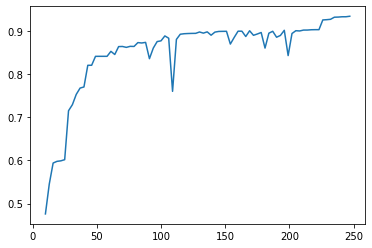

In [8]:
# Variation of r2 with number of features 
sns.lineplot( x=i_list, y=r2_list)

<AxesSubplot:>

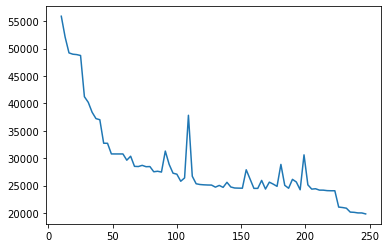

In [9]:
# Variation of RMSE with increasing number of features 
sns.lineplot( x=i_list, y=rmse_list)

Observation 

1. It appears that near the 50 features, we hit the point of diminishing returns. 

2. The cross-val scores are very turbulent, indicating that the model does not fit well with the data yet. 

Next steps 

1. Let's keep around 70 features and drop the rest. Why 70? Since around 50 seems like the best number of features, we keep 50 and some extra features, so we don't miss them by chance. 

In [10]:
model = LinearRegression()
i = 70                                                                             # Performing RFE with 3 step jumps
rfe = RFE(model , n_features_to_select = i )                                                          # running RFE with i variable output.
rfe.fit(x_train, y_train)                                                                             # Fit the RFE model 
col = x_train.columns[rfe.support_]                                                                   # identify the columns slected by the RFE model
linear_regressor = LinearRegression()             
linear_regressor.fit(x_train[col],y_train)                                                            # Train a new linear model with RFE slected columns 
crossvalidation = cross_val_score(linear_regressor, x_train[col], y_train, cv=5, n_jobs=-1).mean()    # Calculate the cross vall scores for the new model  
# prediction on the train set. 
y_pred = linear_regressor.predict(x_train[col])
r2_val = r2_score(y_train,y_pred)                                                                         # find R2 and RMSE for the new model 
rmse_error = mean_squared_error (y_train, y_pred, squared = False)
y_pred_test = linear_regressor.predict(x_test[col])
r2_val_test = r2_score(y_test,y_pred_test)                                                                         # find R2 and RMSE on test data for the new model 
rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)
# print the outputs 
print (i)
print ("R2 score for the model is :",r2_val )
print ("RMSE error for the model is :",rmse_error )
print ("R2 score (test) for the model is :",r2_val_test )
print ("RMSE error (test) for the model is :",rmse_error_test )
print ("Mean Cross Validation Score :",crossvalidation )

70
R2 score for the model is : 0.8639874595696678
RMSE error for the model is : 28482.51480605756
R2 score (test) for the model is : -1.969744898744149e+22
RMSE error (test) for the model is : 1.2291698791587108e+16
Mean Cross Validation Score : -6.416257037105127e+22


In [11]:
rfe_cols = col

**Note** 

"['Utilities_NoSeWa', 'Condition2_RRAe', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Heating_OthW', 'GarageQual_Fa'] not in index"

In [12]:
# dropping the rest of the columns form both train and test sets. 
x_train = x_train[rfe_cols]

## Feature selection with correlation plots. 

Correlation plots are a way to detect if changes in one variable create the changes in the other variable. For instance, if two variables exhibit a strong positive correlation, then if one of the variables increases, the other also increases. The rate of increase can be linear or non-linear. 

Using the correlation plots, we can detect such correlated features and drop them.

In [13]:
corr = x_train.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,OverallQual,FullBath,Fireplaces,GarageCars,LotShape_IR2,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_SFoyer,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_ImStucc,Exterior1st_WdShing,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_none,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_none,Heating_OthW,HeatingQC_Po,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,GarageType_BuiltIn,GarageType_none,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,SaleType_Con,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Partial
OverallQual,1.000000,0.539661,0.384819,0.587487,0.073313,-0.002603,0.067363,0.044982,0.038323,0.093154,0.219182,0.364782,0.191022,0.083050,0.117501,-0.024017,-0.153084,0.008094,0.138340,-0.083542,-0.168382,0.189702,-0.057876,-0.002603,-0.024017,-0.022162,0.044982,0.091271,-0.009860,-0.045430,0.131884,0.040223,-0.036191,-0.045430,0.140293,0.072456,0.040223,-0.138964,0.342461,-0.486766,-0.218657,-0.218657,0.157869,-0.218657,0.081074,-0.218657,-0.218657,0.026613,-0.024017,-0.195251,0.397016,-0.548162,-0.048095,0.200544,-0.258084,-0.258084,-0.106451,0.050263,-0.018831,0.235554,-0.258084,-0.126208,-0.014999,-0.034610,0.284427,-0.258084,0.041761,-0.064275,-0.015020,0.311935
FullBath,0.539661,1.000000,0.231612,0.472367,0.095223,-0.030899,0.021383,0.039260,-0.019662,0.187811,0.160276,0.209769,0.053828,0.076194,0.069921,0.022647,0.096506,0.005126,0.066570,-0.093760,-0.014311,0.028878,0.011935,-0.030899,0.022647,0.014445,-0.022623,-0.035071,-0.000708,-0.030899,0.089773,0.022647,-0.049076,-0.030899,0.087268,0.033686,0.022647,-0.067783,0.388483,-0.496683,0.008626,0.008626,0.058341,0.008626,0.130161,0.008626,0.008626,-0.005838,-0.030899,-0.110004,0.372972,-0.406847,-0.061878,0.239789,-0.130280,-0.130280,-0.097627,0.037295,-0.005838,0.145990,-0.130280,-0.099846,-0.021376,-0.021236,0.172342,-0.130280,-0.005838,-0.005838,0.039783,0.239788
Fireplaces,0.384819,0.231612,1.000000,0.281078,0.054038,0.017334,0.077473,0.003818,0.179917,0.108998,0.116995,0.139003,0.037222,0.017334,0.024524,-0.028061,-0.132338,-0.095819,-0.007029,-0.054754,-0.143373,0.138217,-0.076146,0.062728,-0.028061,0.021814,0.030049,0.034712,0.140710,-0.028061,0.021959,0.017334,0.044660,-0.028061,0.019534,0.005406,0.017334,-0.076165,0.081323,-0.125686,-0.080793,-0.080793,0.156059,-0.080793,-0.082249,-0.080793,-0.080793,-0.007588,-0.028061,-0.095819,0.093324,-0.170192,-0.010741,0.121305,-0.184130,-0.184130,-0.063401,0.062822,-0.039701,0.153939,-0.184130,-0.094449,-0.023737,-0.042517,0.212367,-0.184130,0.024524,-0.039701,0.011576,0.040328
GarageCars,0.587487,0.472367,0.281078,1.000000,0.086410,0.008638,0.086624,0.037838,-0.032783,0.096875,0.189997,0.277327,0.110311,0.008638,0.068200,0.008638,-0.012883,-0.070989,0.066696,-0.014276,-0.117074,0.136552,-0.037947,0.008638,0.008638,-0.000465,0.014975,0.056916,-0.001700,-0.030928,0.047046,0.048204,-0.071828,-0.030928,0.046229,0.053580,0.048204,-0.079343,0.308424,-0.442918,-0.097494,-0.097494,0.140742,-0.097494,0.005888,-0.097494,-0.097494,-0.043758,0.008638,-0.248218,0.320021,-0.378213,-0.061936,0.157505,-0.579821,-0.579821,-0.087982,0.009246,-0.043758,0.492426,-0.579821,-0.047016,-0.000465,-0.051551,0.499995,-0.579821,0.012221,-0.071747,0.022913,0.272962
LotShape_IR2,0.073313,0.095223,0.054038,0.086410,1.000000,-0.005295,0.195631,-0.009178,-0.035786,0.084036,0.057666,-0.020486,0.013808,-0.005295,-0.007491,-0.005295,-0.007937,-0.

There are a lot of variables that show correlation. But before we remove them, let's also analyze the VIF values. VIF is a strong indicator of linear relationships in the data. If we reduce the linear relationships, it will also reduce a lot of correlation. 

Again the order of eliminating features based on correlations and VIF values is arbitrary. In this case, we have prioritized VIF as we can automate it; on the other hand, in the case of correlation plots, if we eliminate features manually, it is possible that we might eliminate incorrect features. 

### Feature selection with VIF

In [15]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif.to_string())

C:\Softwares\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                 Features        VIF
40          BsmtQual_none        inf
55      GarageFinish_none        inf
43      BsmtExposure_none        inf
33     Exterior2nd_CBlock        inf
65        GarageCond_none        inf
45      BsmtFinType1_none        inf
29     Exterior1st_CBlock        inf
46      BsmtFinType2_none        inf
60        GarageQual_none        inf
41          BsmtCond_none        inf
54        GarageType_none        inf
64          GarageCond_TA 1917.28000
59          GarageQual_TA 1506.07000
22       RoofMatl_CompShg  489.85000
0             OverallQual   67.95000
20        RoofStyle_Gable   58.77000
56          GarageQual_Fa   53.16000
61          GarageCond_Fa   50.11000
57          GarageQual_Gd   19.96000
3              GarageCars   19.58000
1                FullBath   18.37000
51         KitchenQual_TA   17.73000
62          GarageCond_Gd   17.35000
21          RoofStyle_Hip   16.11000
30    Exterior1st_CemntBd   15.96000
34    Exterior2nd_CmentBd   15.94000
3

Removing features using VIF must be done one by one, not all together, since removing one feature will impact the collinearity of the others as well. 

In [16]:
# Let's remove GarageCond_TA and recheck the VIF values. 

def vif_calc (x_train):
  '''
  x_train = Training feature set
  '''
  vif = pd.DataFrame()
  vif['Features'] = x_train.columns
  vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  #print(vif.to_string())
  topval = vif.head(1)
  return topval

In [17]:
x_train = x_train.drop (["Exterior2nd_CBlock"], axis =1)

In [18]:
x_train1 = x_train.copy()

In [19]:
vif_calc(x_train1)

C:\Softwares\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
42,BsmtExposure_none,inf


Similarly, let's keep removing features until we are left with features with VIF values less than 5.

In [20]:
topval = 100
while topval > 5:
  top = vif_calc(x_train1)
  x_train1 = x_train1.drop ([top["Features"].item()], axis =1)
  topval = top["VIF"].item()

C:\Softwares\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [21]:
len(x_train1.columns)

52

Now we have 50 columns left with little collinearity. Now let's build a model with these columns and note the performace.  

In [22]:
x_train = x_train1.copy()

x_test = x_test[x_train.columns]

Now with reduced features, let's try the correlation plots again. 

In [23]:
corr = x_train.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

,Fireplaces,LotShape_IR2,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR3,Neighborhood_Crawfor,Neighborhood_Gilbert,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_StoneBr,Condition2_PosA,Condition2_PosN,Condition2_RRAn,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_SFoyer,RoofStyle_Hip,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_WdShing,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_Other,BsmtQual_Fa,BsmtQual_TA,BsmtExposure_Gd,BsmtFinType1_Unf,BsmtFinType2_none,Heating_OthW,HeatingQC_Po,KitchenQual_Fa,KitchenQual_Gd,Functional_Maj2,GarageType_BuiltIn,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_none,SaleType_Con,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Partial
Fireplaces,1.000000,0.054038,0.017334,0.077473,0.003818,0.179917,0.108998,0.116995,0.139003,0.037222,0.017334,0.024524,-0.028061,-0.132338,-0.095819,-0.007029,-0.054754,0.138217,0.062728,-0.028061,0.021814,0.030049,0.034712,0.140710,-0.028061,0.017334,0.044660,0.019534,0.005406,0.017334,-0.076165,-0.125686,0.156059,-0.082249,-0.080793,-0.007588,-0.028061,-0.095819,0.093324,-0.010741,0.121305,-0.063401,0.062822,-0.039701,-0.094449,-0.023737,-0.042517,-0.184130,0.024524,-0.039701,0.011576,0.040328
LotShape_IR2,0.054038,1.000000,-0.005295,0.195631,-0.009178,-0.035786,0.084036,0.057666,-0.020486,0.013808,-0.005295,-0.007491,-0.005295,-0.007937,-0.030357,0.003932,-0.028346,-0.005418,-0.005295,-0.005295,0.095871,-0.009178,0.073074,0.019700,-0.005295,-0.005295,-0.023259,-0.010112,-0.012997,-0.005295,-0.028861,-0.103301,0.064426,-0.031384,0.003612,-0.007491,-0.005295,-0.030357,0.040984,-0.010603,0.053295,-0.003971,0.027407,-0.007491,-0.027823,-0.015939,-0.011859,-0.043549,-0.007491,-0.007491,-0.014044,-0.001842
Utilities_NoSeWa,0.017334,-0.005295,1.000000,0.105157,-0.001485,-0.005792,-0.007106,-0.004991,-0.006872,-0.003864,-0.000857,-0.001212,-0.000857,-0.005583,-0.004913,-0.008356,-0.004588,-0.014691,-0.000857,-0.000857,-0.002580,-0.001485,-0.001716,-0.005512,-0.000857,-0.000857,-0.003764,-0.005792,-0.002103,-0.000857,-0.004671,0.032621,-0.009103,-0.018953,-0.004588,-0.001212,-0.000857,-0.004913,0.035673,-0.001716,-0.007613,-0.005220,-0.003106,-0.001212,-0.004503,-0.002580,-0.001919,-0.007048,-0.001212,-0.001212,-0.002273,-0.008859
LotConfig_CulDSac,0.077473,0.195631,0.105157,1.000000,-0.014126,-0.037672,0.033615,0.112535,-0.065346,0.065437,-0.008149,-0.011529,-0.008149,-0.035088,-0.046721,-0.016683,0.086363,0.009087,0.105157,-0.008149,0.127065,-0.014126,-0.016318,0.020469,-0.008149,-0.008149,-0.009600,-0.055077,-0.020003,-0.008149,-0.044418,-0.083130,0.077045,-0.049480,-0.000297,-0.011529,-0.008149,-0.046721,0.062163,-0.016318,-0.004379,-0.049642,0.065232,-0.011529,-0.042822,0.089166,-0.018252,-0.052462,0.068625,-0.011529,0.021321,-0.024479
LotConfig_FR3,0.003818,-0.009178,-0.001485,-0.014126,1.000000,-0.010040,-0.012319,-0.008653,0.140146,-0.006698,-0.001485,-0.002102,-0.001485,-0.009679,-0.008517,0.049601,-0.007953,0.016726,-0.001485,-0.001485,-0.004472,-0.002575,-0.002975,-0.009556,-0.001485,-0.001485,-0.006526,-0.010040,-0.003646,-0.001485,0.100610,-0.045537,-0.015781,0.004222,-0.007953,-0.002102,-0.001485,-0.008517,-0.007147,-0.002975,-0.013198,-0.009050,-0.005384,-0.002102,0.104757,-0.004472,-0.003327,-0.012218,-0.002102,-0.002102,-0.003940,-0.015357
Neighborhood_Crawfor,0.179917,-0.035786,-0.005792,-0.037672,-0.010040,1.000000,-0.048030,-0.033737,-0.046444,-0.026115,-0.005792,-0.008194,-0.005792,0.011129,-0.033207,-0.005368,-0.031008,0.035301,-0.005792,-0.005792,-0.017435,-0.010040,-0.011598,0.111096,-0.005792,-0.005792,0.010104,0.055322,-0.014217,-0.005792,0.026226,0.039561,-0.013957,0.000034,-0.031008,-0.008194,-0.005792,0.021886,0.021040,-0.011598,-0.032999,0.068785,0.021871,0.100566,0.059334,-0.017435,0.055902,-0.047637,-0.008194,-0.008194,0.042897,-0.043658
Neighborhood_Gilbert,0

Still, there are few variables with high correlation values. Let's write a function to extract the pairs of features with high correlations.  

In [24]:

def bad_correlation(df1, treshold=0.3):
    pairs = pd.DataFrame(columns=['feature1','feature2','value'])
    cm = df1.corr() #correlation matrix
    np.fill_diagonal(cm.values, 0) # set diagonal to 0 
    corr = [(cm.index[x], cm.columns[y], cm.iloc[x,y]) for x, y in zip(*np.where(abs(np.tril(cm)) > treshold))] # create couple (feature1, feature2, value)
    for couple in corr:
        feature1, feature2, value = couple
        #print(f'{feature1} and {feature2} are strongly correlated (treshold = {treshold}) (value = {value})')
        entry = {'feature1': [feature1], 'feature2' : [feature2], 'value' : [value]}
        temp = pd.DataFrame(entry)
        pairs = pairs.append (temp)
    return pairs


In [25]:
bad_correlation(x_train)

,feature1,feature2,value
0,Exterior2nd_ImStucc,Exterior1st_ImStucc,0.40737
0,KitchenQual_Gd,BsmtQual_TA,-0.37810
0,GarageCond_Fa,GarageQual_Fa,0.50000
0,GarageCond_Gd,GarageQual_Gd,0.36397
0,GarageCond_Po,GarageQual_Po,0.63164


These pairs of variables with high correlation can be divided into three groups. 

1. They are part of a set of dummy variables created from one column. eg: BsmtQual_TA and BsmtQual_Gd are dummy variables created from BsmtQual. So they are bound to have some correlation. 

2. Correlations are affected by design decisions. E.g.: Exterior2nd_ImStucc and  Exterior1st_ImStucc, clearly the designers chose similar finishes so that the exterior looks good. 

3. Some correlations are not intentional at all. Those are the once we need to eliminate. E.g., GarageType_Detchd  and BsmtQual_TA; logically, there might not be any reason that these factors might be correlated. 

So, let's not remove any of these correlated features since we do not have the domain knowledge to justify eliminating these features. Let's rely on embedded methods to fitter out these features.

## Model 2 : Linear regression with selected features 

In [26]:
#Let's fit a linear regression model!
linear_regressor = LinearRegression()
linear_regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
# Cross validation scores for the model. 
crossvalidation = cross_val_score(linear_regressor, x_train, y_train, cv=5, n_jobs=-1)
crossvalidation

array([ 6.04390524e-01,  6.76379779e-01, -4.51801262e+21, -2.20507843e+24,
       -1.16249625e+23])

In [28]:
# pedictions on the train set. 
y_pred = linear_regressor.predict(x_train)
y_pred_test = linear_regressor.predict(x_test)

In [29]:
# evaluation metrics value 
r2_val = r2_score(y_train,y_pred)
rmse_error = mean_squared_error (y_train, y_pred, squared = False)
r2_val_test = r2_score(y_test,y_pred_test)
rmse_error_test = mean_squared_error (y_test, y_pred_test, squared = False)

# print the outputs 
print ("R2 score for the model is :",r2_val )
print ("RMSE error for the model is :",rmse_error )
print ("R2 score (test) for the model is :",r2_val_test )
print ("RMSE error (test) for the model is :",rmse_error_test )

R2 score for the model is : 0.7261239538292941
RMSE error for the model is : 40417.16807493477
R2 score (test) for the model is : 0.6934370272386841
RMSE error (test) for the model is : 48491.62818594891


Creating infrastructure for the rest of the code. 

In [30]:
def fit_error (y_pred, y ):
  '''
  Evaluates a linear regression model in an input sample
  model: model to be used to make predictions
  y_pred: predicted labels
  y: true labels
  '''
  result = []
  r2_val = r2_score(y,y_pred)
  rmse_error = mean_squared_error (y, y_pred, squared = False)
  result.append (r2_val)
  result.append (rmse_error)
  return result


# calcualte the cross validation scores of a model 
def cross_val (model, x, y, folds):
  '''
  model: model to be fit
  x: features
  y: labels 
  folds: number of folds in kfold cross validation 
  '''
  # Cross validation scores for the model. 
  crossvalidation = cross_val_score(model, x, y, cv=folds, n_jobs=-1)
  return crossvalidation

# create an entry to store the data
def store_results(name, y_pred, ytrain, xtrain, y_pred_test, ytest, xtest, model, folds, norm, Alpha):
  '''
  creates and entry to add to the resuts dataframe
  name: name of the model 
  y_pred: predicted y 
  ytrain: true value of y
  xtrain: features 
  model: model to be fit
  folds: number of folds in cv
  norm: L1 or L2
  Alpha: Value of regularization parameter
  '''
  error1 = fit_error (y_pred,ytrain)
  error2 = fit_error (y_pred_test,ytest)  
  crossvalidation = cross_val (model, xtrain, ytrain, folds)
  entry = {'Model': [name],
          'Regularization' : [norm],
          'Alpha_value' : [Alpha],
          'R2Score': [error1[0]],
          'RMSE': [error1[1]],
          'R2Score_Test': [error2[0]],
          'RMSE_Test': [error2[1]],
          'CrossVal_Mean(r2)': [crossvalidation.mean()],           
          'CrossVal1(r2)': [crossvalidation[0]],
          'CrossVal2(r2)': [crossvalidation[1]],
          'CrossVal3(r2)': [crossvalidation[2]],
          'CrossVal4(r2)': [crossvalidation[3]],
          'CrossVal5(r2)': [crossvalidation[4]],
          }

  result = pd.DataFrame(entry)
  return result

In [31]:
temp = store_results("With 50 Features", y_pred, y_train,x_train, y_pred_test, y_test,x_test, linear_regressor, 5, np.nan, np.nan)
outcomes = pd.read_csv("result.csv")
outcomes = outcomes.append (temp)

In [32]:
outcomes = outcomes.drop(["Unnamed: 0"], axis =1)

In [33]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000


As we can see, r2 has improved, but all other metrics have taken a hit. The cross val score is very turbulent indicating that the model is overfitting.

## Feature Selection with P values 

In [34]:
# Load modules and data
import statsmodels.api as sm

model = sm.OLS(y_train, x_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              147.0
Date:                Sat, 26 Nov 2022   Prob (F-statistic):                        0.00
Time:                        12:53:50   Log-Likelihood:                         -14694.
No. Observations:                1168   AIC:                                  2.949e+04
Df Residuals:                    1116   BIC:                                  2.976e+04
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

As you can see, there are few features with P values much higher than the acceptable limit. 

We can eliminate the features with high p values, but we do not understand the significance of these variables. It is better to use embedded techniques in such cases. 

In cases where you are very confident about the impact of a feature on the label and removing that feature makes sense business-wise, you can remove that feature simply based on p values.

## Model 3: Linear model with ridge (L1) regularization  

In [35]:
from sklearn.linear_model import Ridge
from sklearn import linear_model

In [36]:
ridge_model = linear_model.Ridge(alpha = 0.01, random_state=42)
ridge_model.fit (x_train, y_train)

Ridge(alpha=0.01, random_state=42)

In [37]:
# predictions on the train set. 
y_pred = ridge_model.predict(x_train)
y_pred_test = ridge_model.predict(x_test)

In [38]:
temp = store_results("Ridge-1", y_pred, y_train,x_train, y_pred_test, y_test,x_test, ridge_model, 5, "L1", 0.01)
outcomes = outcomes.append (temp)

In [39]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421


As you can see, the first attempt at regularisation has reduced the overfitting of the cross val scores have normalized a lot.

The parameter alpha or the regularisation coefficient is a hyperparameter we can use to control the intensity of the regularisation. 

In [40]:
# Let's also take a look at the coefficients of the model. 
ridge_model.coef_

array([[  25710.77473182,   19958.34936548,  -47653.02320653,
          22102.39909542,   -1760.93469099,   24240.78853678,
         -15758.98838153,   91330.61746888,   89918.01262474,
          93146.20025222,  171513.11953243,  -86291.49570161,
          25235.93745976,   -3537.80711613,  -51755.47225598,
         -48604.63198486,  -50546.8572591 ,   20802.01218638,
         -52529.46818154,   28101.10582923,   -4755.91009203,
          23543.87824013,  123654.89528382,   19251.91381416,
         -19026.75787051, -151587.30702371,  -25248.93330655,
          42601.4308805 ,  116442.63015125,  -56527.02028162,
         -44489.45600843,  -43802.77813064,   35313.78885507,
          -9262.51516744,  -72578.16879878,   -9479.35630936,
         -36848.54004873,  -15237.5838929 ,   13599.35416214,
         -43595.34761388,   23091.32431664,  -10730.65403699,
          -2492.88990348,   -4893.44651628,  -12061.33522061,
          -7164.11410843,    2555.14008405,  -24602.10832148,
        

1. It appears that there are two sets of coefficients. One of them must be the coefficients for the penalty term. 

Let's try a few different values of aplha and observe the changes in the results and the model. 

In [41]:
for i in [0.0001, 0.0005, 0.001, 0.005, 0.05, 0.1, 0.5, 1, 5]:
  ridge_model = linear_model.Ridge(alpha = i, random_state=42)
  ridge_model.fit (x_train, y_train)

  # predictions on the train set. 
  y_pred = ridge_model.predict(x_train)
  y_pred_test = ridge_model.predict(x_test)
  temp = store_results("Ridge", y_pred, y_train,x_train, y_pred_test, y_test,x_test, ridge_model, 5, "L1", i)
  outcomes = outcomes.append (temp)

In [42]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


As you can see, even with massive changes in the regularization coefficient, the model's fit does not change a lot. But it is a huge step up in generalizability over the vanilla logistic regression. 

In [43]:
from sklearn.linear_model import Ridge, RidgeCV

ridge_cv = RidgeCV(alphas = list(np.arange(1, 20, 0.2)))
ridge_cv.fit(x_train, y_train)

RidgeCV(alphas=array([ 1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,
        3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ,  5.2,
        5.4,  5.6,  5.8,  6. ,  6.2,  6.4,  6.6,  6.8,  7. ,  7.2,  7.4,
        7.6,  7.8,  8. ,  8.2,  8.4,  8.6,  8.8,  9. ,  9.2,  9.4,  9.6,
        9.8, 10. , 10.2, 10.4, 10.6, 10.8, 11. , 11.2, 11.4, 11.6, 11.8,
       12. , 12.2, 12.4, 12.6, 12.8, 13. , 13.2, 13.4, 13.6, 13.8, 14. ,
       14.2, 14.4, 14.6, 14.8, 15. , 15.2, 15.4, 15.6, 15.8, 16. , 16.2,
       16.4, 16.6, 16.8, 17. , 17.2, 17.4, 17.6, 17.8, 18. , 18.2, 18.4,
       18.6, 18.8, 19. , 19.2, 19.4, 19.6, 19.8]))

In [44]:
# what alpha value did the algorithm choose
alpha = ridge_cv.alpha_
alpha

2.3999999999999995

In [45]:
ridge_opti = Ridge(alpha = alpha)
ridge_opti.fit(x_train, y_train)

Ridge(alpha=2.3999999999999995)

In [46]:
y_pred = ridge_opti.predict(x_train)
y_pred_test = ridge_model.predict(x_test)

In [47]:
temp = store_results("Ridge-optimised", y_pred, y_train,x_train, y_pred_test, y_test,x_test, ridge_opti, 5, "L1", alpha)
outcomes = outcomes.append (temp)

In [48]:
ridge_opti.coef_

array([[ 2.68524312e+04,  2.04803950e+04, -1.40519437e+04,
         2.07665206e+04, -6.98154469e+02,  2.17106199e+04,
        -1.60251732e+04,  8.32079058e+04,  8.40117273e+04,
         7.94187310e+04,  4.74150793e+04, -3.55749687e+04,
         6.78637435e+03, -1.22167249e+03, -4.52637034e+04,
        -4.38972527e+04, -4.39990810e+04,  2.18369886e+04,
        -1.53637386e+04,  7.67846487e+03, -4.60318342e+03,
         1.15875951e+04,  7.62746092e+04,  1.89568587e+04,
        -5.31936799e+03, -2.86128803e+04, -2.06428958e+04,
         3.78462063e+04,  6.78216435e+04, -1.25236237e+04,
        -4.19560342e+04, -4.37441556e+04,  3.46794770e+04,
        -8.03285146e+03, -6.63612494e+04, -4.05924659e+03,
        -1.06134856e+04, -1.44367695e+04,  1.45718057e+04,
        -2.81366412e+04,  2.24016547e+04, -1.10993372e+04,
         7.31149376e+03, -1.28863887e+03, -1.09709592e+04,
        -7.81940218e+03,  1.01990629e+00, -2.53373077e+04,
         2.09513429e+04, -5.44397802e+03,  2.68614161e+0

In [49]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


## Model 4: Linear regression with Lasso (L2) Regularization

In [50]:
from sklearn.linear_model import Lasso, LassoCV

In [51]:
lasso_model = linear_model.Lasso(alpha = 0.01, random_state=42)
lasso_model.fit (x_train, y_train)

Lasso(alpha=0.01, random_state=42)

In [52]:
# predictions on the train set. 
y_pred = lasso_model.predict(x_train)
y_pred_test = lasso_model.predict(x_test)

In [53]:
temp = store_results("Lasso", y_pred, y_train,x_train, y_pred_test, y_test,x_test, lasso_model, 5, "L2", 0.01)
outcomes = outcomes.append (temp)

In [54]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


In [55]:
lasso_model.coef_

array([  25705.08628415,   19950.14628173,  -48129.41986752,
         22115.84631175,   -1760.00311611,   24257.76115332,
        -15754.23701881,   91399.23859317,   89949.67008622,
         93242.03430618,  173414.61079486,  -86780.40415496,
         25518.15115798,   -3572.40514504,  -51796.49434649,
        -48635.36317311,  -50594.05976748,   20791.14210594,
        -53062.4997323 ,   28411.54686579,   -4751.82049252,
         23639.12482178,  123973.0879932 ,   19249.11152206,
        -19214.28700739, -153710.57366811,  -25273.20314631,
         42634.27333944,  116997.68419216,  -57197.40656319,
        -44490.76201889,  -43800.07813805,   35322.19382069,
         -9278.39474813,  -72600.45594161,   -9526.76638028,
        -37214.28783114,  -15242.04104696,   13594.20143   ,
        -43691.35019893,   23098.48071194,  -10721.70354627,
         -2673.15079122,   -4932.82628646,  -12076.79797813,
         -7105.24069566,    2578.53631798,  -24593.37652785,
         48242.93284127,

Lasso is an embedded feature selection method. 

In the above model, you can see no coefficients have been reduced to zero. 

Let's change the alphas for lasso and see how many features are reduced to zero. 

In [56]:
for i in [0.0001, 0.0005, 0.001, 0.005, 0.05, 0.1, 0.5, 1, 5, 10, 15, 20]:
  lasso_model = linear_model.Lasso(alpha = i, random_state=42)
  lasso_model.fit (x_train, y_train)

  # pedictions on the train set. 
  y_pred = lasso_model.predict(x_train)
  y_pred_test = lasso_model.predict(x_test)

  # Count the number of zeors in the coeff list. 
  coeflist = list(lasso_model.coef_)
  zeros = list(lasso_model.coef_).count(0)
  print (i)
  print ("The number of zero coeff in the model are :", zeros)
  print ("=======================================================")

  temp = store_results("Lasso", y_pred, y_train,x_train, y_pred_test, y_test,x_test, lasso_model, 5, "L2", i)
  outcomes = outcomes.append (temp)

0.0001
The number of zero coeff in the model are : 0
0.0005
The number of zero coeff in the model are : 0
0.001
The number of zero coeff in the model are : 0
0.005
The number of zero coeff in the model are : 0
0.05
The number of zero coeff in the model are : 0
0.1
The number of zero coeff in the model are : 0
0.5
The number of zero coeff in the model are : 0
1
The number of zero coeff in the model are : 0
5
The number of zero coeff in the model are : 3
10
The number of zero coeff in the model are : 3
15
The number of zero coeff in the model are : 4
20
The number of zero coeff in the model are : 7


In [57]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


Using a discrete set of alpha values does not significantly impact the outcome. Let's use a prewritten library that can help us find the right alpha. 

In [58]:
from sklearn.linear_model import Lasso, LassoCV

lasso_cv = LassoCV(alphas = None, cv = 5, max_iter = 100000, normalize = True)
lasso_cv.fit(x_train, y_train)

C:\Softwares\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LassoCV(cv=5, max_iter=100000, normalize=True)

In [59]:
# what alpha value did the algorithm choose
alpha = lasso_cv.alpha_
alpha

25.612072054200944

Most optimized alpha according to this algorithm is 15.71

In [60]:
lasso_opti = Lasso(alpha = alpha)
lasso_opti.fit(x_train, y_train)

Lasso(alpha=25.612072054200944)

In [61]:
y_pred = lasso_opti.predict(x_train)
y_pred_test = lasso_opti.predict(x_test)

In [62]:
temp = store_results("Lasso-optimised", y_pred, y_train,x_train, y_pred_test, y_test,x_test, lasso_opti, 5, "L2", alpha)
outcomes = outcomes.append (temp)

In [63]:
lasso_opti.coef_

array([  26050.77458711,   19629.2346764 ,  -17123.74361584,
         21102.12249537,      -0.        ,   23203.38062371,
        -15152.15829116,   89919.4544529 ,   88968.24302335,
         89833.01477652,  140375.18472569,  -68650.73074573,
             0.        ,    -402.67611604,  -49845.03337998,
        -47051.20039128,  -48692.76820113,   21200.72668717,
        -21115.90795752,       0.        ,   -1018.76724159,
         12756.8924995 ,  116370.81169788,   19204.73785475,
            -0.        , -109146.67062059,  -22833.06513039,
         41219.72008978,  103705.53729832,  -22244.39424278,
        -44288.66691   ,  -44003.14177037,   34295.44792732,
         -8725.75881954,  -72091.91915275,      -0.        ,
         -6616.45828378,  -14136.40159861,   13852.87581775,
        -36288.28663038,   22510.05595661,  -10660.07589874,
            -0.        ,      -0.        ,  -10374.262929  ,
         -4140.8113166 ,       0.        ,  -25097.93714716,
         33429.10014451,

Notice the number of 0 coefficients in the model. Even after removing these features, the model has performance similar to a different model that uses all features. 

The model named ```lasso``` is the best simplest model. Let's store it as our best attempt in the linear regression family. 



In [64]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


Before moving on to the next algorithm, let's investigate the features that lasso deemed not useful. 

In [65]:
list_of_coeff = list(zip( x_train.columns, lasso_opti.coef_,))
df = pd.DataFrame(list_of_coeff, columns = ['Feature', 'Coeff'])

In [66]:
df[df["Coeff"]==0]

,Feature,Coeff
4,LotConfig_FR3,-0.00000
12,Condition2_RRAn,0.00000
19,RoofMatl_Roll,0.00000
24,Exterior1st_CBlock,-0.00000
35,Heating_OthW,-0.00000
42,GarageQual_Gd,-0.00000
43,GarageQual_Po,-0.00000
46,GarageCond_Po,0.00000
49,SaleType_Oth,-0.00000


In [67]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              147.0
Date:                Sat, 26 Nov 2022   Prob (F-statistic):                        0.00
Time:                        13:41:36   Log-Likelihood:                         -14694.
No. Observations:                1168   AIC:                                  2.949e+04
Df Residuals:                    1116   BIC:                                  2.976e+04
Df Model:                          52                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

As you can see, all the features that lasso deemed non-informative have p values higher than 0.3.

There are other features with higher p values, but lasso deemed that these were the most non-informative features. 

## Model 5: Random Forest regressor. 

Let's use a random forest algorithm to find the feature importance. Once we have the top important features, we can then use them to build a random forest regressor model and compare its performance with the linear models. 

### Feature Importance 

In [68]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(x_train, y_train)

C:\Users\bond007\AppData\Local\Temp/ipykernel_25216/1489653205.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train, y_train)


RandomForestRegressor(random_state=42)

In [69]:
feature_importances = model_rf.feature_importances_
features = x_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances})

In [70]:
df.sort_values(by='importance', ascending = False)

,features,importance
0,Fireplaces,0.24185
31,BsmtQual_TA,0.15586
38,KitchenQual_Gd,0.08752
17,RoofStyle_Hip,0.07168
8,Neighborhood_NridgHt,0.06645
7,Neighborhood_NoRidge,0.04004
32,BsmtExposure_Gd,0.03689
51,SaleCondition_Partial,0.03362
9,Neighborhood_StoneBr,0.02861
28,Exterior2nd_ImStucc,0.02366


Let's get all features with have importance of more than 0.005. 

0.005 is an arbitrary number at this point. We can select as many features as we want. 

In [71]:
df = df[df.importance > 0.005]

In [72]:
rf_cols = []
for col in list(x_train.columns):
  if col in list(df.features):
    rf_cols.append(col)

Let's train a random forest regressor with these features only. 

In [73]:
model_rf = RandomForestRegressor( random_state=42)
model_rf.fit(x_train[rf_cols], y_train)

C:\Users\bond007\AppData\Local\Temp/ipykernel_25216/310662807.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(x_train[rf_cols], y_train)


RandomForestRegressor(random_state=42)

In [74]:
len(rf_cols)

23

In [75]:
predict_rf = model_rf.predict(x_train[rf_cols])
predict_rf_test = model_rf.predict(x_test[rf_cols])

In [76]:
temp = store_results("RF", predict_rf, y_train,x_train[rf_cols], predict_rf_test, y_test,x_test[rf_cols], model_rf, 5, np.nan, np.nan)
outcomes = outcomes.append (temp)

In [77]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


Use of a random forest model has improved the RMSE a lot, and also increased the r2 score. Also, the cross-val scores are tightly grouped, indicating a low variance. 

But for this RF model, we did not tune the hyper parameters. Now, let's try to improve the RF model by adjusting hyper parameters. 

### Use grid search 

In [78]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
estimator = RandomForestRegressor()
param_grid = { 
        "n_estimators"      : [5,10,12,15],
        "min_samples_split" : [5,10,15,20],
        "max_depth"         : [3,4]
        }

grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

grid.fit(x_train[rf_cols], y_train)

print(grid.best_score_)
print(grid.best_params_)

0.5554169325237144
{'max_depth': 4, 'min_samples_split': 20, 'n_estimators': 10}


C:\Softwares\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [81]:
estimator = RandomForestRegressor(n_estimators = 10, min_samples_split = 5, max_depth= 4, n_jobs=-1)
estimator.fit(x_train[rf_cols],y_train)
y_predict_train = estimator.predict(x_train[rf_cols])
y_predict_test = estimator.predict(x_test[rf_cols])
temp = store_results("RF", y_predict_train, y_train,x_train[rf_cols], y_predict_test, y_test,x_test[rf_cols], estimator, 5, np.nan, np.nan)
outcomes = outcomes.append (temp)

C:\Users\bond007\AppData\Local\Temp/ipykernel_25216/543100191.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(x_train[rf_cols],y_train)


In [82]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


### Trying halving grid search (Experimental)

It is an experimental tuning method that can be used to tune hyper parameters. 

In [83]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10],'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestRegressor(random_state=0)
sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,factor=2, resource='n_estimators',max_resources=30).fit(x_train[rf_cols], y_train)
sh.best_estimator_

C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Softwares\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=24,
                      random_state=0)

In [84]:
RF_opti = RandomForestRegressor(n_estimators = 24, min_samples_split = 5, max_depth= 10,random_state=0, n_jobs=-1)
RF_opti.fit(x_train[rf_cols],y_train)
y_predict_train = RF_opti.predict(x_train[rf_cols])
y_predict_test = RF_opti.predict(x_test[rf_cols])
temp = store_results("RF_optimised", y_predict_train, y_train,x_train[rf_cols], y_predict_test, y_test,x_test[rf_cols], RF_opti, 5, np.nan, np.nan)
outcomes = outcomes.append (temp)

C:\Users\bond007\AppData\Local\Temp/ipykernel_25216/1259368532.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF_opti.fit(x_train[rf_cols],y_train)


In [85]:
outcomes

,Model,Regularization,Alpha_value,R2Score,RMSE,R2Score_Test,RMSE_Test,CrossVal_Mean(r2),CrossVal1(r2),CrossVal2(r2),CrossVal3(r2),CrossVal4(r2),CrossVal5(r2)
0,Baseline,NaN,NaN,0.93401,19838.91290,0.84861,34077.08857,0.47391,0.81322,-0.07399,0.74281,0.02033,0.86718
0,With 50 Features,NaN,NaN,0.72612,40417.16807,0.69344,48491.62819,-465169213718491476000768.00000,0.60439,0.67638,-4518012621628216705024.00000,-2205078431335808950599680.00000,-116249624635020299730944.00000
0,Ridge-1,L1,0.01000,0.72612,40417.27188,0.69372,48469.36972,0.66597,0.60452,0.67646,0.70290,0.68175,0.66421
0,Ridge,L1,0.00010,0.72612,40417.16809,0.69344,48491.40265,0.66562,0.60439,0.67638,0.70288,0.68071,0.66373
0,Ridge,L1,0.00050,0.72612,40417.16834,0.69345,48490.50111,0.66563,0.60440,0.67638,0.70288,0.68075,0.66375
0,Ridge,L1,0.00100,0.72612,40417.16913,0.69347,48489.37554,0.66565,0.60440,0.67639,0.70288,0.68080,0.66377
0,Ridge,L1,0.00500,0.72612,40417.19430,0.69358,48480.42489,0.66579,0.60446,0.67642,0.70289,0.68123,0.66397
0,Ridge,L1,0.05000,0.72609,40419.55814,0.69477,48385.93134,0.66728,0.60501,0.67676,0.70295,0.68565,0.66604
0,Ridge,L1,0.10000,0.72601,40425.84237,0.69595,48292.76022,0.66872,0.60556,0.67712,0.70295,0.68989,0.66811
0,Ridge,L1,0.50000,0.72453,40534.35297,0.70186,47820.88468,0.67558,0.60822,0.67934,0.70179,0.70951,0.67904


The third model seems to have balanced both the r2 term and the RMSE term. 

The next algorithm to try should be a boosting algorithm. 

As discussed earlier, a bagging model like RF reduces the variance in the fit. Earlier in this demonstration, we have seen that as well. But even the random forest model could not improve prediction accuracy by a lot. So next, we must try a boosting algorithm. Boosting algorithms reduce the bias error in the fit. 

You will learn boosting algorithms in the next module. Once you learn the boosting algorithm, you can revisit this notebook and try again. 